In [2]:
import pandas as pd
import zipfile
import requests
import os

## Download data from S3

Note, the file for the ubuntu data is large - expect the next cell to take several seconds to run.

In [2]:

import requests

print('Beginning data download.')

url = 'https://edgetier.s3-eu-west-1.amazonaws.com/ubunbu-code-test-data/ubuntu_support_extract.csv.zip'  
r = requests.get(url)

with open('./data/ubuntu_support_data.csv.zip', 'wb') as fh:  
    fh.write(r.content)

# Retrieve HTTP meta-data
print(f"Complete, status: {r.status_code}, content:{r.headers['content-type']}")  


Beginning data download.
Complete, status: 200, content:application/zip


## Unzipping data

In [3]:
print ("Unzipping Data")
with zipfile.ZipFile("./data/ubuntu_support_data.csv.zip", 'r') as file:
    file.extractall("./data/")

print("Data unzipped!")
os.listdir("./data")

Unzipping Data
Data unzipped!


['empty.txt', 'ubuntu_support_data.csv.zip', 'ubuntu_support_extract.csv']

## Loading data

In [21]:
# Load the data into a pandas data frame and print:
data = pd.read_csv("./data/ubuntu_support_extract.csv")
data.head()

,conversation_id,datetime,from,to,text
0,10-10000,2010-04-17 20:15:00+00:00,fk91,NaN,"Hello, I have a minimal linux system: how can ..."
1,10-10000,2010-04-17 20:15:00+00:00,fk91,NaN,"@Maco: ip is there, thanks :)"
2,10-10000,2010-04-17 20:15:00+00:00,sometux,fk91,ifconfig
3,10-10000,2010-04-17 20:15:00+00:00,sometux,fk91,static or dhcp
4,10-10000,2010-04-17 20:16:00+00:00,fk91,NaN,static


In [23]:
data.shape

(3075574, 5)

#### Checking if the from column contains any nan or Null values. Those conv are not important to me as they dont tell anything about any user.

In [134]:
data[pd.isna(data['from'])==True]

,conversation_id,datetime,from,to,text
817847,16-5987,2010-03-29 14:52:00+00:00,NaN,NaN,but grub throws grub_getcharwidth error
817848,16-5987,2010-03-29 14:52:00+00:00,NaN,NaN,and drops to grub recovery
817849,16-5987,2010-03-29 14:52:00+00:00,NaN,NaN,where i can ls the device and partitions
817850,16-5987,2010-03-29 14:53:00+00:00,NaN,NaN,and even folders
817851,16-5987,2010-03-29 14:53:00+00:00,NaN,NaN,i can set the kernel to /vmlinuz
817852,16-5987,2010-03-29 14:53:00+00:00,NaN,NaN,"but when i type boot, it says: no kernel loaded"
817853,16-5987,2010-03-29 14:53:00+00:00,NaN,NaN,"10.04 works, but not 9.10"
817854,16-5987,2010-03-29 14:54:00+00:00,NaN,NaN,so I'm not sure what else to do
817855,16-5987,2010-03-29 14:55:00+00:00,NaN,NaN,does that make sense?
817856,16-5987,2010-03-29 14:56:00+00:00,NaN,NaN,Is there anyone who can help me with my grub e...


In [136]:
data = data[data['from'].notna()]

In [140]:
uni_users = list(data['from'].unique())
print(len(uni_users))

92495


In [141]:
user_dict = {'users':uni_users}

In [10]:
# converting datetime column to datetime format.
data['datetime'] = pd.to_datetime(data['datetime'])

In [85]:
from tqdm.notebook import tqdm

In [88]:
m_count = []
for user in tqdm(user_dict['users']):
    m_count.append(data[data['from'] ==  user].groupby(['conversation_id'])['conversation_id'].unique().count())

  0%|          | 0/92496 [00:00<?, ?it/s]

In [147]:
len(m_count)

92495

In [148]:
user_dict['conv_count']  = m_count

## Test 1 (No. of Conversations) :  
I calculated the avg no. of conv among all the users and will take into account only those users having no.of conv above average. This way I can get rid of users that are not active much. This also helps me with my first step to get the data down to a form which can be handled 

In [149]:
avg_count = sum(m_count)/len(m_count)

In [177]:
avg_count

7.828661008703173

In [244]:
for i,item in enumerate(m_count):
    if item < avg_count:
        #print(i)
        user_dict['users'].pop(i)
        user_dict['conv_count'].pop(i)
        #count += 1

In [245]:
len(user_dict['conv_count'])

14797

In [252]:
init_df = pd.DataFrame(user_dict)

In [255]:
init_df

,users,conv_count
0,sometux,63
1,mrapple,17
2,ikonia,5203
3,tumenjargal,19
4,nukelacity,16
...,...,...
14792,ker,8
14793,mw_netbook,8
14794,ricko,8
14795,sidh_,10


In [254]:
init_df.to_csv('init_df.csv', index=False)

## Test 2a (Active Period) : 
Initial test- to calculate a specific user's activity in the span of 2 years I take the conv for that user, iterate through them and take timedelta between the first and last message. then add this for all the conv that user was part of. But the double iteration is running too long, need to optimize this code. 

In [300]:
activity = []
for user in tqdm(init_df['users'][0:5]):
    convs = list(data[data['from']==user]['conversation_id'].unique())
    active = 0
    for conv in convs:
        subset = data[(data['from']==user) & (data['conversation_id']==conv)].datetime
        delta = pd.to_datetime(subset.iloc[-1]) - pd.to_datetime(subset.iloc[0])
        active += int(delta.total_seconds()/60)
    activity.append(active)

  0%|          | 0/5 [00:00<?, ?it/s]

In [376]:
init_df[init_df['users'] == 'kernelupdate']

,users,conv_count,activity(in min),score
11131,kernelupdate,8,28,2.400813


In [385]:
def getActiveList(user):
    active = []
    convs = list(data[data['from']==user]['conversation_id'].unique())
    for conv in convs:
        subset = data[(data['from']==user) & (data['conversation_id']==conv)].datetime
        delta = pd.to_datetime(subset.iloc[-1]) - pd.to_datetime(subset.iloc[0])
        active.append(int(delta.total_seconds()/60))
    return active

Guest88905
kernelupdate

In [386]:
user1 = getActiveList('Guest88905')
user2 = getActiveList('kernelupdate')

In [389]:
xlist1 = ['u1c1', 'u2c1', 'u1c2', 'u2c2', 'u1c3', 'u2c3', 'u1c4', 'u2c4', 'u1c5', 'u2c5', 'u1c6', 'u2c6', 'u1c7', 'u2c7', 'u1c8', 'u2c8']
xlist = ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8']

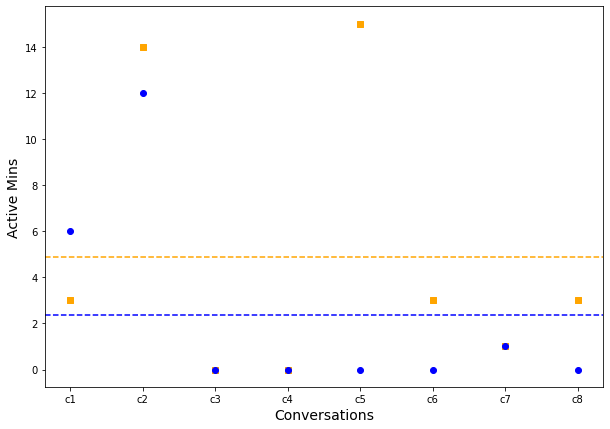

In [414]:
fig = plt.figure(figsize=(10,7))

plt.scatter(xlist, user1, color='orange', marker='s')
plt.scatter(xlist, user2, color='blue')

plt.axhline(y=sum(user1)/len(user1), linestyle='--', color='orange')
plt.axhline(y=sum(user2)/len(user2), linestyle='--', color='blue')

plt.xlabel('Conversations', fontsize=14)
plt.ylabel('Active Mins', fontsize=14)
plt.show()

In [301]:
activity

[365267, 58, 133429022, 43, 66]

## Test 2b (Active Period) : 
Second approach is to take the activity time of an user as the timedelta between his/her first activity and last activity. Theres a catch in this, maybe the user did a conv during the start of time span and 1 in the end. with this approach his activity time will still be large but no.of conv very less. But this factor i am taking into consideration in Test 1. also my next test will remove users who are using this technique to increase their activity time.

In [313]:
activity2 = []
for user in tqdm(init_df['users']):
    sub = data[data['from']==user].sort_values(by='datetime').datetime
    delta  = pd.to_datetime(sub.iloc[-1]) - pd.to_datetime(sub.iloc[0])
    activity2.append(int(delta.total_seconds()/60))

  0%|          | 0/14797 [00:00<?, ?it/s]

In [315]:
init_df['activity(in min)'] = activity2

In [316]:
init_df

,users,conv_count,activity(in min)
0,sometux,63,479031
1,mrapple,17,592285
2,ikonia,5203,1032001
3,tumenjargal,19,571175
4,nukelacity,16,43530
...,...,...,...
14792,ker,8,8771
14793,mw_netbook,8,4
14794,ricko,8,52820
14795,sidh_,10,231352


## Test 3 (Efficiency) :
Now that I have conv count and activity period for the top 15k users, i try to calculate their efficiency. I take an approach similar to calculating tf-idf but not exactly same. The conv count of every user / log(activity period) = efficiency score. 

In [317]:
from math import log

In [328]:
score = []
for i in tqdm(range(0, len(init_df.users))):
    score.append(init_df['conv_count'][i] / log(init_df['activity(in min)'][i]))

  0%|          | 0/14797 [00:00<?, ?it/s]

In [330]:
init_df['score'] = score

In [337]:
init_df.sort_values(by='score', ascending=False).tail(15)

,users,conv_count,activity(in min),score
14722,chilicuil,8,983202,0.579770
12978,cyberjorge,8,986559,0.579627
10599,Pitel,8,992156,0.579390
13498,thomc,8,992193,0.579388
9098,abhi_,8,993134,0.579348
12966,zer0her0,8,993687,0.579325
13257,ravigehlot,8,994983,0.579270
14278,edson,8,998329,0.579129
13925,DrDuck,8,999061,0.579099
13180,seanbright,8,1008183,0.578718


### Explanation: 
Top 15 users are stored in the top_users.csv. If we look at the above table which showcases bottom 15 users, we can see all have done same no .of conv=8 but the last user's (solexious - least scored) activity time is much more than the first users's (chilicuil - most scored in this table). Which suggests that solexious had wasted more time than chilicuil and been less efficient.

In [335]:
top_users = init_df.sort_values(by='score', ascending=False).head(15)

In [336]:
top_users.to_csv('top_users.csv', index=False)

In [352]:
top_users

,users,conv_count,activity(in min),score
68,ActionParsnip,10436,1048227,752.816350
27,Dr_Willis,7365,884510,537.874347
90,bazhang,5707,1047747,411.696518
2,ikonia,5203,1032001,375.748983
47,erUSUL,4615,690972,343.228463
57,jrib,4188,1022036,302.660042
329,Pici,3829,1041596,276.337100
1379,FloodBot1,3596,1048215,259.403012
293,theadmin,3505,1045875,252.879354
192,ZykoticK9,3318,815673,243.759650


## Visualizations
1. Bar chart representing conversation counts of the top 15 users with the count denoted. 

In [338]:
import matplotlib.pyplot as plt

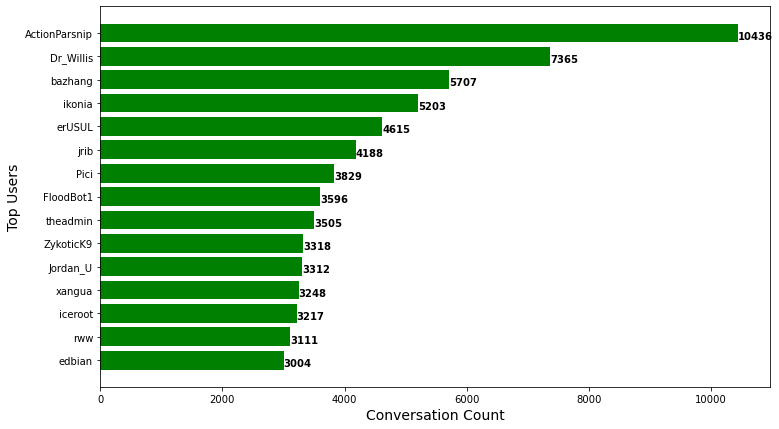

In [415]:
fig = plt.figure(figsize=(12,7))

plt.barh(top_users.users, top_users.conv_count, color='green')
for i, v in enumerate(top_users.conv_count):
    plt.text(v, i + .25, str(v), fontweight='bold')
plt.xlabel('Conversation Count', fontsize=14)
plt.ylabel('Top Users', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

Text(0, 0.5, '1 / Log of Activity Period')

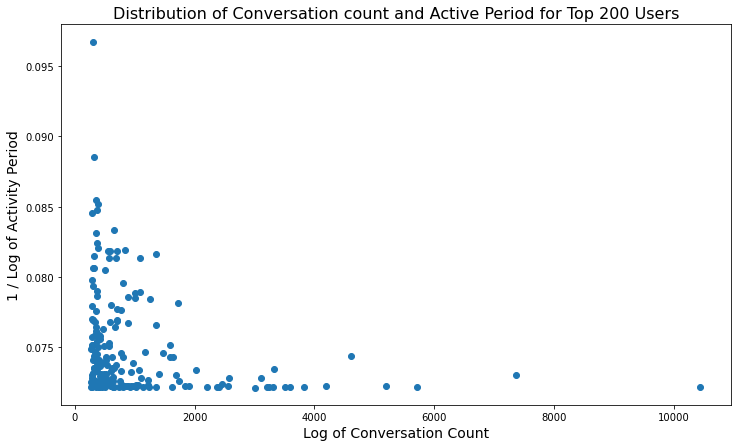

In [454]:
fig = plt.figure(figsize=(12,7))

plt.scatter(init_df.sort_values(by='conv_count', ascending=False)[0:200]['conv_count'], init_df.sort_values(by='conv_count', ascending=False)[0:200]['activity(in min)'].apply(lambda x : 1/log(x)))
plt.title('Distribution of Conversation count and Active Period for Top 200 Users', fontsize=16)
plt.xlabel('Log of Conversation Count', fontsize=14)
plt.ylabel('1 / Log of Activity Period', fontsize=14)


## Task 2 - Phatic Chat Classifier

In [511]:
text_data = pd.DataFrame(data['text'])

In [516]:
text_data[text_data['text'].isna()==True]

,text
1807096,NaN
2830696,NaN


In [518]:
text_data.dropna(inplace=True)

In [521]:
text_data.reset_index(inplace=True)

In [524]:
text_data.drop(columns='index', inplace=True)

### Creating a list of phatic words containing pleasantries, farewells, greetings for the labeling process

In [487]:
phatic_words = ["Hello", "Hi", "Hey", "Greetings", "Salutations", "Good morning", "Good afternoon", "Good evening", "Howdy", "Yo", "What's up?", "How's it going?", "How are you doing?", "How do you do?", "Nice to see you", "Nice to meet you", "Pleased to meet you", "Great to see you", "It's a pleasure to meet you", "It's good to see you", "Good to meet you", "How's your day going?", "What have you been up to?", "What's new?", "How have you been?", "How's life treating you?", "How's everything?", "What's happening?", "What's going on?", "What's the latest?", "How's your family?", "How are the kids?", "How's your spouse/partner?", "How's your health?", "I hope you're doing well.", "I hope everything is going well for you.", "I hope you're having a good day.", "Have a good one.", "Take care.", "Bye for now.", "See you later.", "See you soon.", "Catch you later.", "Talk to you soon.", "It was nice talking to you.", "It was great seeing you.", "Thank you.", "Thanks.", "Thank you very much.", "Thanks a lot.", "Thanks a million.", "You're welcome.", "No problem.", "It's my pleasure.", "Excuse me.", "Pardon me.", "Sorry.", "My apologies.", "No worries.", "Don't mention it.", "Anytime.", "I'm glad I could help.", "Congratulations.", "Well done.", "Good job.", "Great work.", "You deserve it.", "Happy birthday.", "Happy anniversary.", "Best wishes.", "Good luck.", "Break a leg.", "Take it easy.", "Chill out.", "Relax.", "Enjoy.", "Cheers.", "Bottoms up.", "Here's to you.", "Raise a glass.", "Let's toast.", "Merry Christmas.", "Happy Hanukkah.", "Happy Kwanzaa.", "Happy holidays.", "Happy New Year.", "Ring in the new year.", "Best of luck in the new year.", "All the best in the new year.", "May your dreams come true.", "Make it a great day.", "Make it a great week.", "Make it a great weekend.", "Have a blast.", "Live it up.", "Party on.", "Keep in touch.", "Stay in touch.", "Drop me a line.", "Give me a call."]

In [488]:
phatic_slangs = ["Hello", "Hi", "Hey", "Yo", "What's up", "Howdy", "G'day", "Good morning", "Good afternoon", "Good evening", "How's it going?", "How are you doing?", "What's new?", "What's happening?", "What's going on?", "How's your day going?", "Nice to meet you", "Pleasure to meet you", "Good to see you", "Long time no see", "What's good?", "Wassup?", "Sup?", "How's life treating you?", "How's everything?", "How's the weather?", "Thank you", "Thanks", "Cheers", "Much appreciated", "You're welcome", "No problem", "No worries", "My pleasure", "Excuse me", "Pardon me", "Sorry", "My apologies", "It's all good", "Take care", "See you later", "Catch you later", "Later", "Bye", "Goodbye", "Adios", "Ciao", "Hasta la vista", "Peace out", "Goodbye", "Bye", "See you later", "Catch you later", "Later", "Peace out", "Adios", "Hasta la vista", "Ciao", "So long", "Take care", "Have a good one", "Have a good day", "Have a good night", "Have a good weekend", "Have a good trip", "Safe travels", "Drive safely", "Stay safe", "Keep in touch", "Talk to you soon", "See you soon", "Until next time", "Farewell", "All the best", "Best wishes", "Have a good one", "Cheers", "Later gator", "Smell you later", "Toodle-oo", "Ta-ta", "Bye-bye", "See ya", "Laters", "Gotta run", "I'm out", "I'm off", "Peace", "Deuces", "Hello", "Hi", "Hey", "Yo", "What's up", "Howdy", "G'day", "Good morning", "Good afternoon", "Good evening", "How's it going?", "How are you doing?", "What's new?", "What's happening?", "What's going on?", "How's your day going?", "Nice to meet you", "Pleasure to meet you", "Good to see you", "Long time no see", "What's good?", "Wassup?", "Sup?", "How's life treating you?", "How's everything?", "How's the weather?", "Aloha", "Bonjour", "Hola", "Namaste", "Salaam", "Shalom", "Hey there", "Greetings", "Welcome", "Ahoy", "Hiya", "Yoohoo", "Howdy-do", "Howdy-partner", "Howdy y'all", "What it do?", "What's crackin'?", "What's poppin'?", "What's goodie?", "What's the word?", "What's the haps?", "What's cooking?", "What's shaking?", "What's the deal?", "How's tricks?", "How's your mama?", "Howdy ma'am/sir", "Well, well, well", "Look who it is", "Long time, no talk", "Hi-de-ho", "Top of the morning to you", "G'day mate", "Greetings and salutations", "Hello there, handsome/beautiful", "Sup champ?", "How's it hanging?", "How's your hat?", "Heyo"]

In [489]:
phatic_slangs = list(set(phatic_slangs))

In [492]:
phatic = phatic_words + phatic_slangs

In [494]:
phatic = list(set(phatic))

In [495]:
len(phatic)

198

In [497]:
phatic[0:5]

['Hola', "I hope you're doing well.", 'Adios', 'Goodbye', "What's new?"]

In [529]:
text_data.text = [x.lower() for x in text_data.text]

In [532]:
phatic = [x.lower() for x in phatic]

In [537]:
!pip install fuzzywuzzy


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [548]:
s='hey, how are you?'
s1='hey'

from fuzzywuzzy import fuzz

print(fuzz.partial_ratio(s,s1))

100


In [554]:
text_data['phatic'] = ''

In [556]:
for i,text in tqdm(enumerate(text_data['text'])):
    if text in phatic:
        text_data['phatic'][i] = 1
    else:
        text_data['phatic'][i] = 0

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [1]:
text_data.to_csv('text_data.csv', index=False)

NameError: name 'text_data' is not defined

In [3]:
text_data = pd.read_csv('text_data.csv')

In [4]:
lab_text_data, unseen_text_data = text_data[0:2241107], text_data[2241107:-1]

In [5]:
unseen_text_data.reset_index(inplace=True)

In [6]:
lab_text_data['phatic'] = lab_text_data['phatic'].astype(int)

<ipython-input-6-51f5968e8cab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lab_text_data['phatic'] = lab_text_data['phatic'].astype(int)


In [7]:
lab_text_data[lab_text_data['phatic']==1]

,text,phatic
50,hi,1
158,sorry,1
210,hello,1
229,thank you,1
297,thanks,1
...,...,...
2240316,thanks,1
2240394,no problem,1
2240397,thanks.,1
2240573,you're welcome.,1


#### After labeling a large chunk of data, it was found the 2 classes are imbalanced with almost 1:100 ratio. So i will be using under-sampling as i still have a lot of data.

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [9]:
X, test_X, Y, test_Y = model_selection.train_test_split(lab_text_data['text'], lab_text_data['phatic'], stratify=lab_text_data['phatic'], test_size=0.2)
train_X, val_X, train_Y, val_Y = model_selection.train_test_split(X, Y, stratify=Y, test_size=0.2)

In [10]:
print(len(train_X))
print(len(train_Y))
print(len(val_X))
print(len(val_Y))
print(len(test_X))
print(len(test_Y))

1434308
1434308
358577
358577
448222
448222


#### Vectorizing

In [11]:
vec = TfidfVectorizer()
vec.fit(lab_text_data['text'])

TfidfVectorizer()

In [12]:
train_X_vecs = vec.transform(train_X)
val_X_vecs = vec.transform(val_X)
test_X_vecs = vec.transform(test_X)

In [13]:
train_X_vecs.shape

(1434308, 235292)

#### Under-sampling

In [591]:
!pip install imblearn


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from imblearn.under_sampling import RandomUnderSampler

sampler = RandomUnderSampler(sampling_strategy=0.1, random_state = 42)

In [15]:
train_X_vecs_res, train_Y_res = sampler.fit_resample(train_X_vecs, train_Y)

In [16]:
train_Y_res.shape

(186329,)

#### with undersampling - good results

In [53]:
Naive = naive_bayes.MultinomialNB(alpha=1.0,fit_prior=True)
Naive.fit(train_X_vecs_res, train_Y_res)

pred_NB = Naive.predict(val_X_vecs)

print(classification_report(val_Y, pred_NB))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    354342
           1       0.79      0.50      0.61      4235

    accuracy                           0.99    358577
   macro avg       0.89      0.75      0.81    358577
weighted avg       0.99      0.99      0.99    358577



In [17]:
SVM = svm.SVC(C=1.0, kernel='linear')
SVM.fit(train_X_vecs_res, train_Y_res)

pred_SVM = SVM.predict(val_X_vecs)

print(classification_report(val_Y, pred_SVM))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    354342
           1       0.74      0.99      0.84      4235

    accuracy                           1.00    358577
   macro avg       0.87      0.99      0.92    358577
weighted avg       1.00      1.00      1.00    358577



In [57]:
Logistic_R = LogisticRegression()
Logistic_R.fit(train_X_vecs_res, train_Y_res)

pred_LR = Logistic_R.predict(val_X_vecs)

print(classification_report(val_Y, pred_LR))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    354342
           1       0.72      0.98      0.83      4235

    accuracy                           1.00    358577
   macro avg       0.86      0.99      0.92    358577
weighted avg       1.00      1.00      1.00    358577



#### without undersampling- bad results

In [18]:
Naive = naive_bayes.MultinomialNB(alpha=1.0,fit_prior=True)
Naive.fit(train_X_vecs, train_Y)

pred_NB = Naive.predict(val_X_vecs)

print(classification_report(val_Y, pred_NB))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    354342
           1       0.00      0.00      0.00      4235

    accuracy                           0.99    358577
   macro avg       0.49      0.50      0.50    358577
weighted avg       0.98      0.99      0.98    358577



#### Using my best performing model on val data (SVM) on the test data

In [18]:
pred_test_SVM = SVM.predict(test_X_vecs)

print(classification_report(test_Y, pred_test_SVM))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    442929
           1       0.72      0.99      0.84      5293

    accuracy                           1.00    448222
   macro avg       0.86      0.99      0.92    448222
weighted avg       1.00      1.00      1.00    448222



In [19]:
SVM_report = classification_report(test_Y, pred_test_SVM, output_dict=True)
data_SVM = pd.DataFrame(SVM_report).transpose()
data_SVM.to_csv('SVM_report.csv')

In [20]:
data_SVM

,precision,recall,f1-score,support
0,0.999898,0.995505,0.997697,442929.000000
1,0.724962,0.991498,0.837536,5293.000000
accuracy,0.995458,0.995458,0.995458,0.995458
macro avg,0.862430,0.993502,0.917616,448222.000000
weighted avg,0.996651,0.995458,0.995805,448222.000000


#### using model on unseen data

In [22]:
unseen_text_data['text']

0                             is there a router in the way?
1                      yeah i think he has a verizon router
2         please tell him to forward port 22 onto his lo...
3         that would require me to alter the settings of...
4                yes, he needs to make the change, not you?
                                ...                        
834434    llutz_ yeah now i am removing old grub and now...
834435                                              do tell
834436    llutz_ now i have the latest kernel .29 and .2...
834437    i told installing grub2 and removing old gurb ...
834438                               synaptic is a safe way
Name: text, Length: 834439, dtype: object

In [23]:
unseen_vecs = vec.transform(unseen_text_data['text'])

In [24]:
unseen_label = SVM.predict(unseen_vecs)

In [34]:
count = 0
for i,a in enumerate(unseen_label):
    if a == 1:
        count += 1
        #print(unseen_text_data['text'][i])
print(count)

15888


In [35]:
unseen_text_data['phatic'] = unseen_label

<ipython-input-35-dd2ac8b412cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen_text_data['phatic'] = unseen_label


In [38]:
unseen_text_data[unseen_text_data['phatic']==1].head(10)

,index,text,phatic
356,2241463,no problem :d,1
398,2241505,thanks,1
708,2241815,hey :),1
709,2241816,howdy,1
1591,2242698,bye bye,1
1695,2242802,you welcome anytime,1
1697,2242804,bye,1
1715,2242822,thanks,1
1720,2242827,thanks,1
1791,2242898,hey,1


### So out of 834439 unseen text conv 15888 got labelled as phatic